In [1]:
import pandas as pd
import numpy as np
import os

# 文件路径
file_paths = {
    '31.25ms': r"D:\06_engineering\03_analysis\pj_gptp_simulation\DATA_100hops\output_data\te_data_3125ms_v2.csv",
    '62.5ms': r"D:\06_engineering\03_analysis\pj_gptp_simulation\DATA_100hops\output_data\te_data_625ms_v2.csv",
    '125ms': r"D:\06_engineering\03_analysis\pj_gptp_simulation\DATA_100hops\output_data\te_data_125ms_v2.csv"
}

# 要查询的跳数
hops_to_check = [1, 7, 10, 25, 50, 75, 100]

# 创建结果存储字典
results = {}

# 处理每个文件
for period, file_path in file_paths.items():
    # 检查文件是否存在
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        continue
    
    try:
        # 读取CSV文件，确保科学计数法正确解析
        df = pd.read_csv(file_path, float_precision='high')
        
        # 存储当前周期的结果
        hop_results = {}
        
        # 对每个需要的跳数，找出绝对值最大值并转换为微秒
        for hop in hops_to_check:
            hop_col = str(hop)  # 列名应该是字符串形式的跳数
            
            if hop_col in df.columns:
                # 计算绝对值最大值，并从秒转换为微秒（乘以10^6）
                max_abs_value = df[hop_col].abs().max() * 1_000_000
                hop_results[hop] = max_abs_value
            else:
                hop_results[hop] = "N/A"
                print(f"在{period}周期文件中未找到{hop}跳的数据")
        
        results[period] = hop_results
        
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {str(e)}")
        results[period] = {hop: "Error" for hop in hops_to_check}

# 创建DataFrame来格式化输出
result_df = pd.DataFrame(results)
result_df.index.name = '跳数'

# 设置显示选项，避免科学计数法，显示完整数字
pd.set_option('display.float_format', '{:.6f}'.format)

# 打印表格
print("\n绝对值最大时间误差数据表 (单位: 微秒)")
print("=" * 60)
print(result_df)
print("=" * 60)


绝对值最大时间误差数据表 (单位: 微秒)
     31.25ms   62.5ms    125ms
跳数                            
1   0.611143 1.223268 2.420831
7   0.659982 1.188944 2.458716
10  0.715463 1.297205 2.489624
25  0.812699 1.429507 2.746461
50  1.404052 1.719228 2.847903
75  1.782555 2.540207 3.451800
100 2.965739 3.295136 4.332786


---

In [2]:
import pandas as pd
import numpy as np
import os

# 文件路径
file_paths = {
    '31.25ms': r"D:\06_engineering\03_analysis\pj_gptp_simulation\DATA_100hops\output_data\te_data_3125ms_v2.csv",
    '62.5ms': r"D:\06_engineering\03_analysis\pj_gptp_simulation\DATA_100hops\output_data\te_data_625ms_v2.csv",
    '125ms': r"D:\06_engineering\03_analysis\pj_gptp_simulation\DATA_100hops\output_data\te_data_125ms_v2.csv"
}

# 要查询的跳数
hops_to_check = [1, 7, 10, 25, 50, 75, 100]

# 创建结果存储字典
results = {}

# 处理每个文件
for period, file_path in file_paths.items():
    # 检查文件是否存在
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        continue
    
    try:
        # 读取CSV文件，确保科学计数法正确解析
        df = pd.read_csv(file_path, float_precision='high')
        
        # 存储当前周期的结果
        hop_results = {}
        
        # 对每个需要的跳数，找出绝对值最大值并转换为微秒
        for hop in hops_to_check:
            hop_col = str(hop)  # 列名应该是字符串形式的跳数
            
            if hop_col in df.columns:
                # 计算绝对值最大值，并从秒转换为微秒（乘以10^6）
                max_abs_value = df[hop_col].abs().max() * 1_000_000
                hop_results[hop] = max_abs_value
            else:
                hop_results[hop] = "N/A"
                print(f"在{period}周期文件中未找到{hop}跳的数据")
        
        results[period] = hop_results
        
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {str(e)}")
        results[period] = {hop: "Error" for hop in hops_to_check}

# 创建DataFrame来格式化输出
result_df = pd.DataFrame(results)
result_df.index.name = '跳数'

# 设置显示选项，避免科学计数法，显示完整数字
pd.set_option('display.float_format', '{:.6f}'.format)

# 打印表格
print("\n绝对值最大时间误差数据表 (单位: 微秒)")
print("=" * 60)
print(result_df)
print("=" * 60)

# 保存结果到CSV文件
output_path = r"output_data\time_error_max_values_microseconds.csv"
result_df.to_csv(output_path)
print(f"\n结果已保存到: {output_path}")


绝对值最大时间误差数据表 (单位: 微秒)
     31.25ms   62.5ms    125ms
跳数                            
1   0.611143 1.223268 2.420831
7   0.659982 1.188944 2.458716
10  0.715463 1.297205 2.489624
25  0.812699 1.429507 2.746461
50  1.404052 1.719228 2.847903
75  1.782555 2.540207 3.451800
100 2.965739 3.295136 4.332786

结果已保存到: output_data\time_error_max_values_microseconds.csv


---

图表已保存至: output_image\maxTE_bar_chart_20250417.png


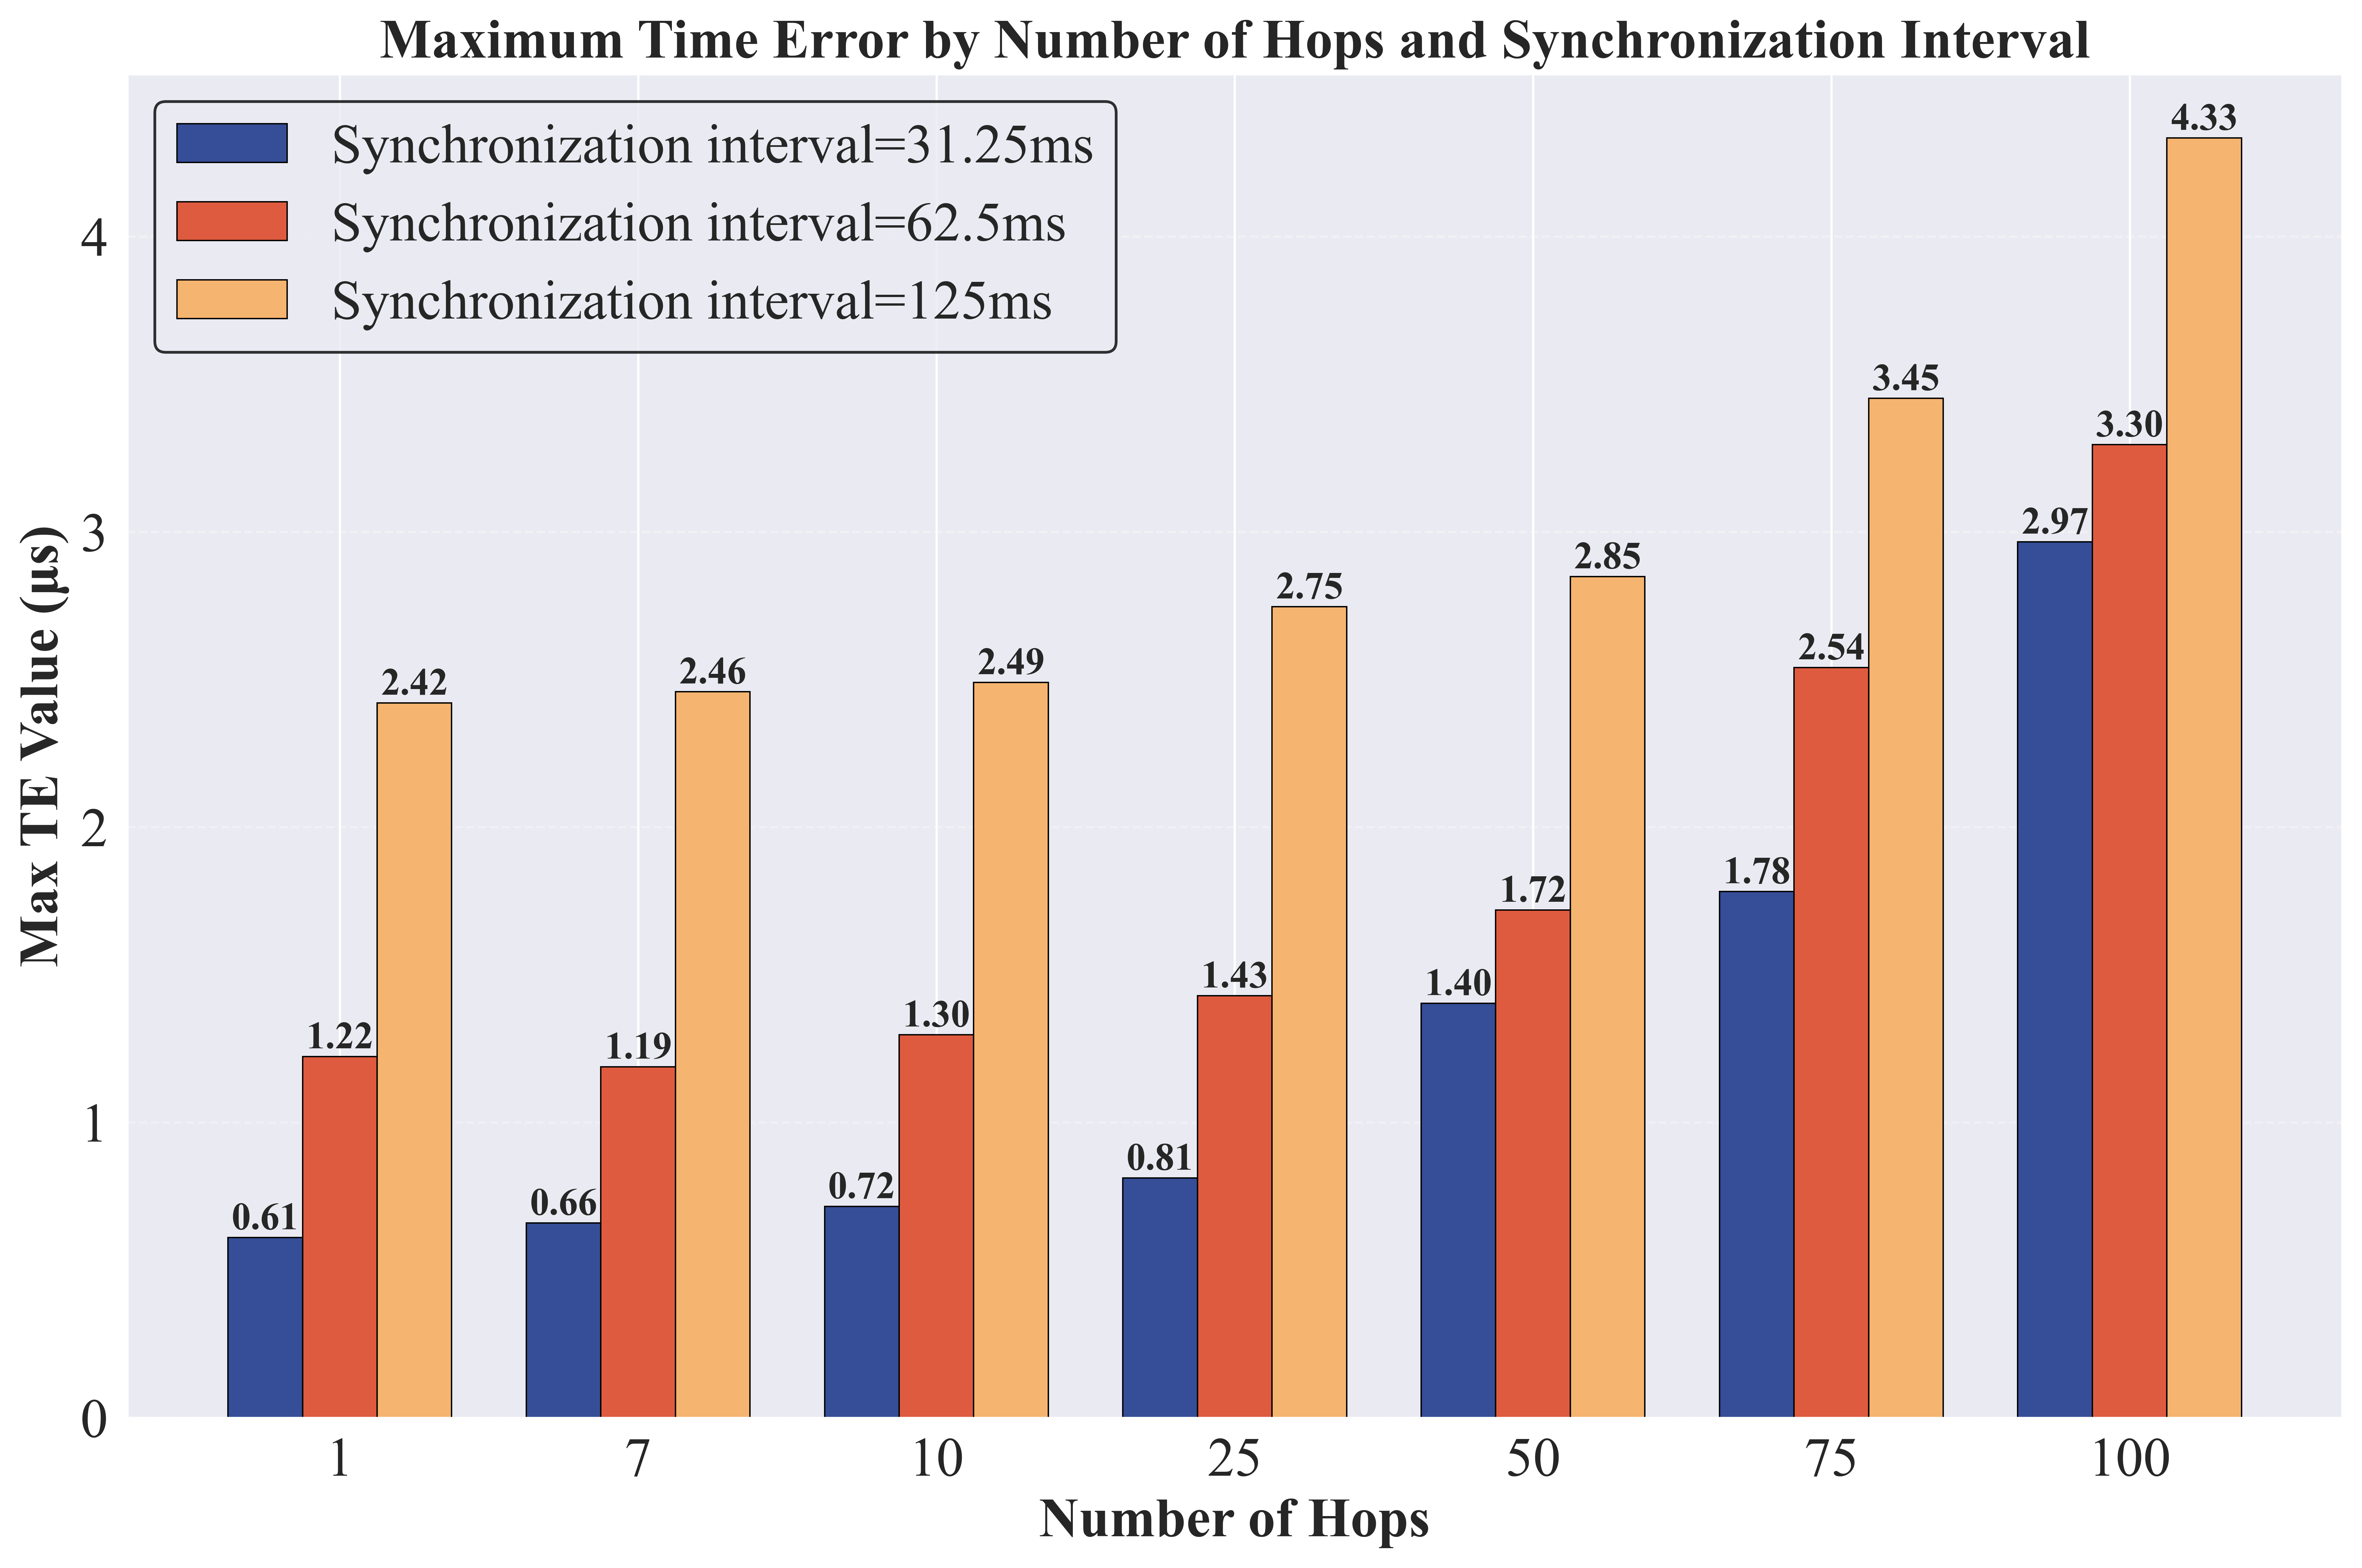

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置CSV文件路径
csv_path = r"output_data\time_error_max_values_microseconds.csv"

# 检查文件是否存在
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV文件未找到，请检查路径: {csv_path}")

# 从CSV文件读取数据
try:
    # 将第一列作为索引读取
    df = pd.read_csv(csv_path, index_col=0)
    # 将索引改名为"hops"以便于后续处理
    df.index.name = 'hops'
    # 重置索引，将hops变成普通列以便于绘图
    df = df.reset_index()
except Exception as e:
    raise ValueError(f"读取CSV文件失败: {str(e)}")

# 检查数据格式
if 'hops' not in df.columns or len(df.columns) < 2:
    raise ValueError("CSV文件格式不正确，请确保包含跳数列和同步周期数据列")

# 使用提供的配色方案 [053,078,151], [223,091,063], [245,180,111]
colors = ['#354e97', '#df5b3f', '#f5b46f']  # 对应RGB(53,78,151), (223,91,63), (245,180,111)

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# 创建图表
plt.figure(figsize=(12, 8), dpi=600)

# 条形图参数
bar_width = 0.25
x = np.arange(len(df['hops']))

# 绘制条形图
for i, col in enumerate(df.columns[1:]):  # 跳过第一列'hops'
    bars = plt.bar(x + i*bar_width, df[col], width=bar_width,
            color=colors[i % len(colors)], edgecolor='black', linewidth=0.5,
            label=f'Synchronization interval={col}')
    
    # 在每个条形上方添加数值标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',  # 保留两位小数
                 ha='center', va='bottom',
                 fontsize=14, fontweight='bold')

# 添加图表元素
plt.xlabel('Number of Hops', fontsize=20, fontweight='bold')
plt.ylabel('Max TE Value (μs)', fontsize=20, fontweight='bold')
plt.title('Maximum Time Error by Number of Hops and Synchronization Interval', fontsize=20, fontweight='bold')
plt.xticks(x + bar_width, df['hops'], fontsize=20)
plt.yticks(fontsize=20)

# 添加图例和网格
plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局
plt.tight_layout()

# 保存图表
output_dir = r"output_image"
os.makedirs(output_dir, exist_ok=True)  # 创建输出目录
output_path = os.path.join(output_dir, "maxTE_bar_chart_20250417.png")
plt.savefig(output_path, dpi=600, bbox_inches='tight')
print(f"图表已保存至: {output_path}")

plt.show()